# First Practical Work

## Andres Navarro Pedregal
## NIA: 100451730

## Summary

In this practial work, we will be optimizing a portfolio of European ETF in order to maximize the projected return on investment given some fund contraints. This work will study different approaches for a fund allocation for different segments of the population like age groups, years to retire, goals, believes, etc. Moreover, we will make recommendation on the best approaches for them.

In order to perform the optimization, we will be using two methods:

1. The first method will consists on a continuous approach where we will try to maximize the percentage of ETFs to buy in order to get the maximum ROI. Moreover, we will add some constraints like the maximum risk, the maxium allocation in order to make a diversified portfolio and more.

2. And the second approach will add some binary varaibles in order to better fit the model to a real scenario such as only selecting a few funds or turning on or off different paramentes.

## Dataset

In order to study the different funds, we will be using a dataset consisting of all European ETFs given by MorningStar. It can be found here [link](https://www.kaggle.com/datasets/stefanoleone992/european-funds-dataset-from-morningstar). It is a dataset consisting of 9500 different funds with more than 132 entries (different types of performance analysis, returns, etc.)

In [1]:
import pandas as pd

data = pd.read_csv("ETFs.csv")
data

,ticker,isin,fund_name,inception_date,category,rating,analyst_rating,risk_rating,performance_rating,investment_strategy,...,fund_return_2016_q4,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down
0,0P00000C5S,CH0008899764,iShares SMI® ETF (CH),1999-10-06,Switzerland Equity,3.0,Negative,3.0,3.0,The Fund aims to achieve a return on your inve...,...,1.45,5.10,10.47,-4.09,4.18,-4.00,-3.96,10.56,15,8
1,0P00000FYY,SE0000693293,XACT OMXS30 UCITS ETF,2000-10-30,Sweden Equity,2.0,NaN,2.0,2.0,The fund is an exchange-traded index fund and ...,...,5.21,11.32,1.66,1.43,4.99,-6.15,-7.21,10.11,16,7
2,0P00000GCE,DE000A0H08N1,iShares STOXX Europe 600 Personal & Household ...,2002-07-08,Sector Equity Consumer Goods & Services,3.0,NaN,3.0,3.0,iShares STOXX Europe 600 Personal & Household ...,...,-1.51,5.34,8.17,6.48,4.83,4.12,-2.03,9.24,17,6
3,0P00000GF2,DE0006289465,iShares eb.rexx® Government Germany UCITS ETF ...,2003-02-04,EUR Government Bond,2.0,NaN,2.0,2.0,iShares eb.rexx Government Germany (DE) is an ...,...,-2.14,4.21,6.04,9.67,0.05,4.96,-3.72,-5.67,13,10
4,0P00000GKU,IE0032523478,iShares € Corp Bond Large Cap UCITS ETF EUR (D...,2003-03-17,EUR Corporate Bond,3.0,NaN,3.0,3.0,The investment objective of this Fund is to pr...,...,-2.74,5.58,6.26,10.55,1.38,3.78,-5.02,-5.84,16,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9490,0P0001K8E2,LU2099288503,Lyxor Core Global Government Bond (DR) UCITS E...,2020-06-24,Global Bond,NaN,NaN,NaN,NaN,The investment objective of MULTI UNITS LUXEMB...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
9491,0P0001K9DU,LU1220245556,Lyxor MSCI Pacific Ex Japan UCITS ETF - D-USD,2015-04-29,Pacific ex-Japan Equity,3.0,NaN,4.0,3.0,The Lyxor MSCI Pacific Ex Japan UCITS ETF is a...,...,2.25,11.22,8.06,4.26,11.13,-12.89,NaN,NaN,13,8
9492,0P0001K9DV,LU1923627332,Lyxor MSCI Russia UCITS ETF Dist,2019-03-14,Russia Equity,2.0,Negative,4.0,2.0,The investment objective of the MULTI UNITS LU...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2
9493,0P0001K9DW,LU1650492256,MULTI-UNITS LUXEMBOURG - Lyxor FTSE 100 UCITS ...,2017-11-09,UK Large-Cap Equity,NaN,Bronze,NaN,NaN,The Lyxor FTSE 100 UCITS ETF is a UCITS compli...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,5


Here we can see the dataset which consists mainly on different ETFs which belongs to different sectors and have different characteristics. But there are many so let's only study a few of them so we can better use them to understand and get some insights.

We will only study the following characteristics:
- Fund name: name of the fund in order to know which fund we are working with.
- Sector_*: a number from 0 to 100 which tells the percentage of relation to that sector. We will be using this to make some correlation matrices and make our porfolio diversified.
- Management_Fees: this is the percentage of management fees the fund has per yearly basis. We want it as it influences the ROI at the end of the year.
- Sustainability_rank: this is a number from 0 to 5 given by MoringStar which tells how sustainable a fund is, being 5 the most sustainable.
- Fund_return_*: percentage return for a given year.
- Dividend_yield_factor: this it the percentage the fund has paid yearly on average with respect to its price.
- Assets_*: this is the percentage this fund has invested in the different assets classes (stocks, bonds, and cash). It will be used in order to adjust the conservativity of funds to be less volatile.
- Fund_size: this is the fund size in dollars. It will be used to select different strategies to make the allocation more towards larger or smaller funds.

In [2]:
columns = ["fund_name", 
"sector_basic_materials", 
"sector_consumer_cyclical", "sector_financial_services", "sector_real_estate", "sector_consumer_defensive", "sector_healthcare", "sector_utilities", "sector_communication_services", "sector_energy", "sector_industrials", "sector_technology",
"management_fees", "sustainability_rank",
"fund_return_2019", "fund_return_2018", "fund_return_2017", "fund_return_2016", "fund_return_2015" , 
"dividend_yield_factor" , "asset_stock" , "asset_bond" , "asset_cash" , "fund_size"]
df = data[columns]

#### Dataset Cleanup

First of all, we have to check if our dataset is properly formatted and if it has null values. So let's start checking it.

In [3]:
df.isna().sum()

fund_name                           0
sector_basic_materials           4576
sector_consumer_cyclical         4385
sector_financial_services        4510
sector_real_estate               5081
sector_consumer_defensive        4685
sector_healthcare                4838
sector_utilities                 5008
sector_communication_services    4490
sector_energy                    5029
sector_industrials               4403
sector_technology                4705
management_fees                   409
sustainability_rank              3096
fund_return_2019                 1834
fund_return_2018                 3161
fund_return_2017                 3865
fund_return_2016                 4606
fund_return_2015                 5202
dividend_yield_factor            3502
asset_stock                         0
asset_bond                          0
asset_cash                          0
fund_size                          14
dtype: int64

Here we can see the different entries by columns that have null values. So let's first fix them so we don't have missing data when we are working with it.

First of all, we will be removing all funds that do not have a fund size or management_fees as they are less than 500 entries and they are not that significant.

In [4]:
df = df.dropna(subset=["fund_size"])
df = df.dropna(subset=["management_fees"])


Now, we will properly format the percentage variables so they are from 0 to 1. This way the formulas will be much easier.

In [5]:
df["management_fees"] = df["management_fees"] / 100
df["dividend_yield_factor"] = df["dividend_yield_factor"] / 100

asset_columns = df.filter(regex="asset_*").columns
df[asset_columns] = df[asset_columns] / 100

print(df.isna().sum())

fund_name                           0
sector_basic_materials           4309
sector_consumer_cyclical         4127
sector_financial_services        4239
sector_real_estate               4801
sector_consumer_defensive        4416
sector_healthcare                4568
sector_utilities                 4732
sector_communication_services    4232
sector_energy                    4752
sector_industrials               4137
sector_technology                4440
management_fees                     0
sustainability_rank              2880
fund_return_2019                 1640
fund_return_2018                 2875
fund_return_2017                 3569
fund_return_2016                 4292
fund_return_2015                 4876
dividend_yield_factor            3242
asset_stock                         0
asset_bond                          0
asset_cash                          0
fund_size                           0
dtype: int64


Now, we will take care of the dividend_yield_factor and the sutainability_rank. This two we will make the empty values 0 as this will assume the worst case scenario, but we don't have to delete them.

In [6]:
df["dividend_yield_factor"] = df["dividend_yield_factor"].fillna(0)
df["sustainability_rank"] = df["sustainability_rank"].fillna(0)

And for the sectors we will do something similar, make them 0. This will make the funds that are empty for a specific sector assume that they do not have anything with that sector.

In [7]:
sector_columns = df.filter(regex="sector_*").columns
df[sector_columns] = df[sector_columns].fillna(0)

Now let's check the other empty values we have left regarding the fund return.

In [8]:

print(df.isna().sum())
df.shape

fund_name                           0
sector_basic_materials              0
sector_consumer_cyclical            0
sector_financial_services           0
sector_real_estate                  0
sector_consumer_defensive           0
sector_healthcare                   0
sector_utilities                    0
sector_communication_services       0
sector_energy                       0
sector_industrials                  0
sector_technology                   0
management_fees                     0
sustainability_rank                 0
fund_return_2019                 1640
fund_return_2018                 2875
fund_return_2017                 3569
fund_return_2016                 4292
fund_return_2015                 4876
dividend_yield_factor               0
asset_stock                         0
asset_bond                          0
asset_cash                          0
fund_size                           0
dtype: int64


(9081, 24)

Here we see that there are quite a few funds with empty return. We will make them 0 to assume they did not return anything. Ans also we will scale them down to be from 0 to 1 as explained before.

In [9]:
fund_columns = df.filter(regex="fund_return").columns
df[fund_columns] = df[fund_columns].fillna(0) / 100
print(df.isna().sum())

fund_name                        0
sector_basic_materials           0
sector_consumer_cyclical         0
sector_financial_services        0
sector_real_estate               0
sector_consumer_defensive        0
sector_healthcare                0
sector_utilities                 0
sector_communication_services    0
sector_energy                    0
sector_industrials               0
sector_technology                0
management_fees                  0
sustainability_rank              0
fund_return_2019                 0
fund_return_2018                 0
fund_return_2017                 0
fund_return_2016                 0
fund_return_2015                 0
dividend_yield_factor            0
asset_stock                      0
asset_bond                       0
asset_cash                       0
fund_size                        0
dtype: int64


### Feautre Engineering

Now that we have all our dataset cleaned and properly formatted, we can now do some feature engineering to get other variables that will be more useful in our study. First of all we will be creating two new variables:

1. Fund return: this will be the mean of the return of the funds from 2015 to 2020. We will be using this to calculate the fund return on average as it is the best predictor for the future.

2. Fund risk: this will be the standard deviation of the years from 2015 to 2020. This will be used to assess the volatility of the fund so we can make our porfolio more or less volatile therefore riskier.

In [10]:
df["fund_return"] = df.filter(regex="fund_return*").mean(axis=1)
df["fund_risk"] = df.filter(regex="fund_return*").std(axis=1)

### Data Exploration

Now that we have the dataset, we will study first some relationships to have some inutition on what influences the return of a fund. So let's start looking at the distributions and comparing the return with with fund risk and the size.

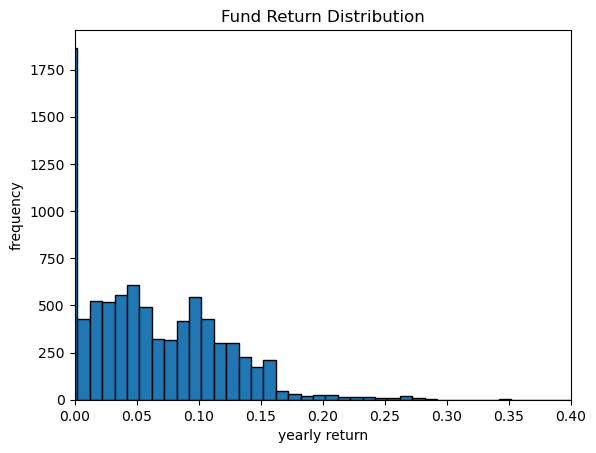

In [11]:
import matplotlib.pyplot as plt

bin_width = 0.01
num_bins = int((df['fund_return'].max() - df['fund_return'].min()) / bin_width)
ax = df['fund_return'].plot(kind='hist', bins=num_bins, edgecolor='k')
ax.set_xlim(0, 0.4)

# Add labels and a title
plt.xlabel('yearly return')
plt.ylabel('frequency')
plt.title('Fund Return Distribution')

# Show the plot
plt.show() 

The fund return we can see that it somewhat ensembles a exponential distribution, this makes sense as it is loginal that the average fund returns like a 10% per year (which is the standard) and there are outlier as seen. We can see some funds which return more than 30% and we will study if those are because of they are taking huges amounts of risk.

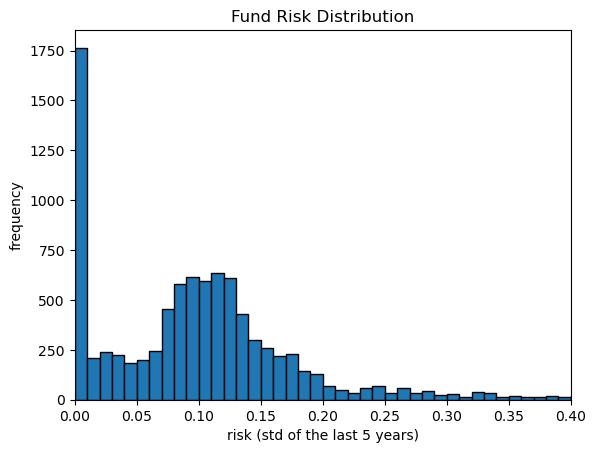

In [12]:
bin_width = 0.01
num_bins = int((df['fund_risk'].max() - df['fund_risk'].min()) / bin_width)
ax = df['fund_risk'].plot(kind='hist', bins=num_bins, edgecolor='k')
ax.set_xlim(0, 0.4)

# Add labels and a title
plt.xlabel('risk (std of the last 5 years)')
plt.ylabel('frequency')
plt.title('Fund Risk Distribution')

# Show the plot
plt.show() 

In the fund risk distribution, we can see that it is somewhat like a normal distribution and that makes sense. Most funds are average but there are some risky and some conservative funds.

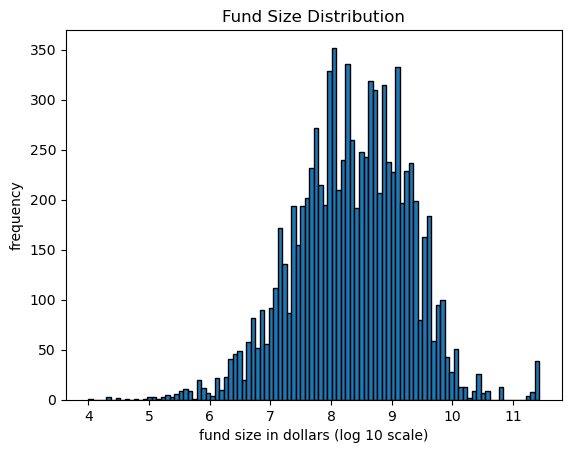

In [13]:
import numpy as np 

ax = np.log10(df['fund_size']).plot(kind='hist', bins=100, edgecolor='k')

# Add labels and a title
plt.xlabel('fund size in dollars (log 10 scale)')
plt.ylabel('frequency')
plt.title('Fund Size Distribution')

# Show the plot
plt.show() 

And lastly for the fund size we can see the they follow a normal ditribution which makes sense. And let's comprare this variables and see what it happens between them.

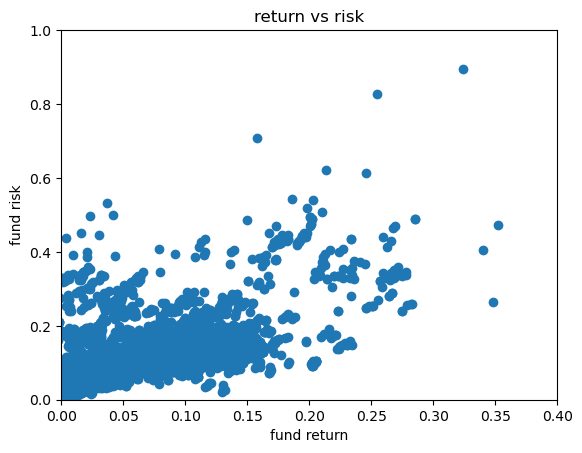

In [14]:
fig, ax = plt.subplots()
ax.scatter(df['fund_return'], df['fund_risk'])

ax.set_xlim(0, 0.4)
ax.set_ylim(0, 1)
# Add labels and a title
plt.xlabel('fund return')
plt.ylabel('fund risk')
plt.title('return vs risk')

# Show the plot
plt.show()

Here we can see the relationship between the return of a fund with their risk associated. We can see an uptrend relationship as it makes sense. The riskier the fund the more return it can be generate.

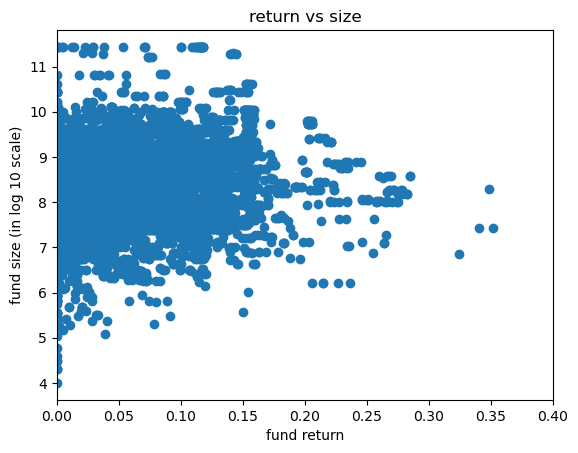

In [15]:
fig, ax = plt.subplots()
ax.scatter(df['fund_return'], np.log10(df['fund_size']))

ax.set_xlim(0, 0.4)
#ax.set_ylim(0, 1)
# Add labels and a title
plt.xlabel('fund return')
plt.ylabel('fund size (in log 10 scale)')
plt.title('return vs size')

# Show the plot
plt.show()

For the fund return vs the size we can see the the larger the fund, then the more conservative the fund is. This can be because the general population (most popular funds to invest) are more conservative as the normal person does not look for high returns with high risk, they look for stable investments.

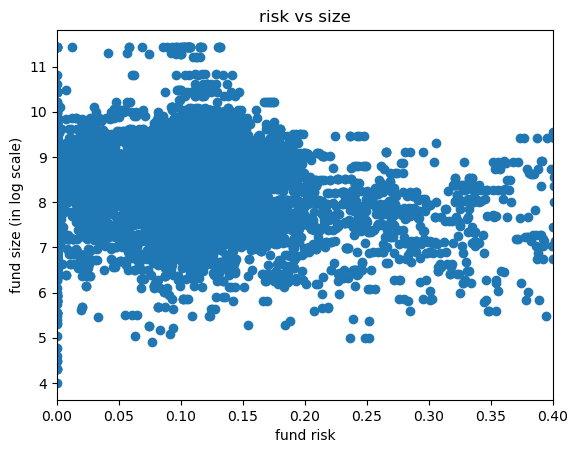

In [16]:
fig, ax = plt.subplots()
ax.scatter(df['fund_risk'], np.log10(df['fund_size']))

ax.set_xlim(0, 0.4)
#ax.set_ylim(0, 1)
# Add labels and a title
plt.xlabel('fund risk')
plt.ylabel('fund size (in log scale)')
plt.title('risk vs size')

# Show the plot
plt.show()

Finally, study the fund risk with the fund size, we see the same as the previous plot.

### Dataset Hypothesis

- The average return of a fund is 10%.
- The average risk associated to a fund is 10%, that is that usually we can expect a return between 0% and 20%.
- We can say, that the funds with the largest size, they are more conservative than the average.
- The funds that return the highest, they are riskier than the average

We will study more associations when we make different portfolios but in general, HIGH RISK HIGH REWARD.

# 1st Approach (Continuous)

In the first approach we will be creating portfolio allocations for differetn groups, according to their risk levels, years to retire, environmental corcerns, and assets sizes. For this we will be creating a python class, so we it is easier to study the groups. But first of all let's state the model that we want to optimize.

#### Sets
- Fund indexes (i): this will be our set so we can create parameters for each fund

#### Parameters
*Take care that all parameters are related to a specific fund*
- Return ($R_i$): this is the average return of the fund for the last 5 years
- Risk ($\sigma_i$): this is the standard deviation of the return of the last 5 years
- Fund Size ($F_i$): this is the total amount that the fund manages in dollars
- Management Fee ($M_i$): fee that the fund takes every year
- Dividend Yield ($D_i$): percentage of the fund price that it gives to their shareholders
- Asset Stock ($AS_i$): percentage of stocks a fund holds with respect to their assets
- Asset Bonds ($AB_i$): percentage of bonds a fund holds with respect to their assets
- Asset Cash ($AC_i$): percentage of cash a fund holds with respect to their assets
- Sustainability Rank ($S_i$): rank from 0 to 5 which indicates how sustainable the fund is

#### Variables
- Percentage to invest ($x_i$): (real non negative) percentage of the portfolio to invest in a specific fund

#### Objective Function
For this problem, we will maximize the total return of the entire portfolio, taking into account the avg return, dividend yield, and management fees of each of them.

$ max(\Sigma_{i = 0}^{N} {(R_i + D_i - M_i) * x_i})$

#### Constraints
- Budget: the sum of all investments cannot be larger than 100%. Formula:
$ \Sigma_{i = 0}^{N} {x_i} \leq 1$
- Maximum Risk: the average risk of the portfolio cannot be larger than a MAX_INVESTMENT_RISK (MIR). Formula:
$ \Sigma_{i = 0}^{N} {\sigma_i * x_i} \leq MIR$
- Maximum Allocation: the maximum percentage that can be invested in a specific fund cannot be larger than MAX_ALLOCATION (MA). Formula:
$ x_i \leq MA \forall i \in (0, N)$
- Minimum Fund Size: the average fund size of the portolio cannot be less than a MIN_FUND_SIZE (MiFS). Formula:
$ \Sigma_{i = 0}^{N} {F_i * x_i} \geq MiFS$
- Maximum Fund Size: the average fund size of the portolio cannot be higher than a MAX_FUND_SIZE (MaFS). Formula:
$ \Sigma_{i = 0}^{N} {F_i * x_i} \leq MaFS$
- Minimum Dividend Yield: the average dividend yield of the portolio cannot be less than a MIN_DIVIDEND_YIELD (MiDY). Formula:
$ \Sigma_{i = 0}^{N} {D_i * x_i} \geq MiDY$
- Maximum Dividend Yield: the average dividend yield of the portolio cannot be higher than a MAX_DIVIDEND_YIELD (MaDY). Formula:
$ \Sigma_{i = 0}^{N} {D_i * x_i} \leq MaDY$
- Minimum Asset Stock percentage: the minimum percentage of stocks a comany has cannot be less than a MIN_ASSET_STOCK (MiAS). Formula:
$ \Sigma_{i = 0}^{N} {AS_i * x_i} \geq MiAS$
- Maximum Asset Stock percentage: the maximum percentage of stocks a comany has cannot be higher than a MAX_ASSET_STOCK (MaAS). Formula:
$ \Sigma_{i = 0}^{N} {AS_i * x_i} \leq MaAS$
- Minimum Asset Bond percentage: the minimum percentage of bonds a comany has cannot be less than a MIN_ASSET_BOND (MiAB). Formula:
$ \Sigma_{i = 0}^{N} {AB_i * x_i} \geq MiAB$
- Maximum Asset Bond percentage: the maximum percentage of bonds a comany has cannot be higher than a MAX_ASSET_BOND (MaAB). Formula:
$ \Sigma_{i = 0}^{N} {AB_i * x_i} \leq MaAB$
- Minimum Asset Cash percentage: the minimum percentage of cash a comany has cannot be less than a MIN_ASSET_CASH (MiAC). Formula:
$ \Sigma_{i = 0}^{N} {AC_i * x_i} \geq MiAC$
- Maximum Asset Cash percentage: the maximum percentage of cash a comany has cannot be higher than a MAX_ASSET_CASH (MaAC). Formula:
$ \Sigma_{i = 0}^{N} {AC_i * x_i} \leq MaAC$
- Minimum Sustainability Rank: the minimum average rank of all the funds to invest cannot be less than a MIN_SUSTAINABILITY_RANK (MSR). Formula:
$ \Sigma_{i = 0}^{N} {S_i * x_i} \geq MSR$


In [17]:

from pyomo.environ import *

class Portfolio_Simple:
    def __init__(self, data, constraints):
        self.data = data
        self.constraints = constraints
        self.setup()

    def setup(self):
        self.model =  ConcreteModel()

        self.model.Funds = Set(initialize = self.data.index, doc = "Funds")

        self.model.Return = Param(self.model.Funds, initialize = self.data["fund_return"].to_dict(), doc="Return")
        self.model.Risk = Param(self.model.Funds, initialize = self.data["fund_risk"].to_dict(), doc="Risk")
        self.model.FundSize = Param(self.model.Funds, initialize = self.data["fund_size"].to_dict(), doc="Fund Size")
        self.model.MgnFee = Param(self.model.Funds, initialize = self.data["management_fees"].to_dict(), doc="Management Fees")
        self.model.DivYield = Param(self.model.Funds, initialize = self.data["dividend_yield_factor"].to_dict(), doc="Dvidend Yield")
        self.model.AssetStockPercentage = Param(self.model.Funds, initialize = self.data["asset_stock"].to_dict(), doc="Asset Stock Percentage")
        self.model.AssetBondPercentage = Param(self.model.Funds, initialize = self.data["asset_bond"].to_dict(), doc="Asset Bond Percentage")
        self.model.AssetCashPercentage = Param(self.model.Funds, initialize = self.data["asset_cash"].to_dict(), doc="Asset Cash Percentage")
        self.model.SustainabilityRank = Param(self.model.Funds, initialize = self.data["sustainability_rank"].to_dict(), doc="Sustainability Rank")

        self.model.x = Var(self.model.Funds, within=NonNegativeReals)

        def profit_rule(model):
            return sum((model.Return[i] + model.DivYield[i] - model.MgnFee[i])*model.x[i] for i in model.Funds)
        self.model.obj = Objective(rule=profit_rule, sense = maximize, doc = "Total revenue")
        
        self.setup_constraints()
    
    def setup_constraints(self):
        def budget_constraint(model):
            return (sum(model.x[i] for i in model.Funds) <= 1)
        self.model.budget = Constraint(rule=budget_constraint,doc="Maximum allocation is 100%")

        def max_risk_constraint(model):
            return sum(model.Risk[i] * model.x[i] for i in model.Funds) <= self.constraints["MAX_INVESTMENT_RISK"]
        self.model.max_risk = Constraint(rule=max_risk_constraint,doc="Investment risk")

        def max_allocation_constraint(model, fund):
            return (model.x[fund] <= self.constraints["MAX_ALLOCATION"])
        self.model.max_allocation = Constraint(self.model.Funds, rule=max_allocation_constraint, doc="Max allocation for a fund")

        def min_fund_size_constraint(model):
            return (sum(model.FundSize[i] * model.x[i] for i in model.Funds) >= self.constraints["MIN_FUND_SIZE"])
        self.model.min_fund_size = Constraint(rule=min_fund_size_constraint,doc="Min fund size")

        def max_fund_size_constraint(model):
            return (sum(model.FundSize[i] * model.x[i] for i in model.Funds) <= self.constraints["MAX_FUND_SIZE"])
        self.model.max_fund_size = Constraint(rule=max_fund_size_constraint,doc="Max fund size")

        def min_dividend_yield_factor_constraint(model):
            return (sum(model.DivYield[i] * model.x[i] for i in model.Funds) >= self.constraints["MIN_DIVIDEND_YIELD_FACTOR"])
        self.model.min_divided_yield = Constraint(rule=min_dividend_yield_factor_constraint,doc="Min dividend yield")

        def max_dividend_yield_factor_constraint(model):
            return (sum(model.DivYield[i] * model.x[i] for i in model.Funds) <= self.constraints["MAX_DIVIDEND_YIELD_FACTOR"])
        self.model.max_divided_yield = Constraint(rule=max_dividend_yield_factor_constraint,doc="Max dividend yield")

        def min_asset_stock_constraint(model):
            return (sum(model.AssetStockPercentage[i] * model.x[i] for i in model.Funds) >= self.constraints["MIN_ASSET_STOCK"])
        self.model.min_asset_stock = Constraint(rule=min_asset_stock_constraint,doc="Min asset stock")

        def max_asset_stock_constraint(model):
            return (sum(model.AssetStockPercentage[i] * model.x[i] for i in model.Funds) <= self.constraints["MAX_ASSET_STOCK"])
        self.model.max_asset_stock = Constraint(rule=max_asset_stock_constraint,doc="Max asset stock")

        def min_asset_bond_constraint(model):
            return (sum(model.AssetBondPercentage[i] * model.x[i] for i in model.Funds) >= self.constraints["MIN_ASSET_BOND"])
        self.model.min_asset_bond = Constraint(rule=min_asset_bond_constraint,doc="Min asset bond")

        def max_asset_bond_constraint(model):
            return (sum(model.AssetBondPercentage[i] * model.x[i] for i in model.Funds) <= self.constraints["MAX_ASSET_BOND"])
        self.model.max_asset_bond = Constraint(rule=max_asset_bond_constraint,doc="Max asset bond")

        def min_asset_cash_constraint(model):
            return (sum(model.AssetCashPercentage[i] * model.x[i] for i in model.Funds) >= self.constraints["MIN_ASSET_CASH"])
        self.model.min_asset_cash = Constraint(rule=min_asset_cash_constraint,doc="Min asset cash")

        def max_asset_cash_constraint(model):
            return (sum(model.AssetCashPercentage[i] * model.x[i] for i in model.Funds) <= self.constraints["MAX_ASSET_CASH"])
        self.model.max_asset_cash = Constraint(rule=max_asset_cash_constraint,doc="Max asset cash")

        def min_sustainability_rank_constraint(model):
            return (sum(model.SustainabilityRank[i] * model.x[i] for i in model.Funds) >= self.constraints["MIN_SUSTAINABILITY_RANK"])
        self.model.min_sustainability_rank = Constraint(rule=min_sustainability_rank_constraint,doc="Min sustainability rank")

    def solve(self):
        solver = SolverFactory('gurobi')
        self.model.dual = Suffix(direction=Suffix.IMPORT)

        self.results = solver.solve(self.model)
        self.model.solutions.store_to(self.results)

        print("Yearly return: ", self.model.obj())

        x_results = [value(v) for v in self.model.component_data_objects(Var, active=True)]

        fund_risk = sum(self.model.Risk[i] * x_results[idx] for idx, i in enumerate(self.model.Funds))
        print("Risk: ", fund_risk)

        dividend_yield = sum(self.model.DivYield[i] * x_results[idx] for idx, i in enumerate(self.model.Funds))
        print("Dividend Yield: ", dividend_yield)

        asset_stock = sum(self.model.AssetStockPercentage[i] * x_results[idx] for idx, i in enumerate(self.model.Funds))
        print("Assets stock: ", asset_stock)

        asset_bond = sum(self.model.AssetBondPercentage[i] * x_results[idx] for idx, i in enumerate(self.model.Funds))
        print("Assets bond: ", asset_bond)

        asset_cash = sum(self.model.AssetCashPercentage[i] * x_results[idx] for idx, i in enumerate(self.model.Funds))
        print("Assets cash: ", asset_cash)

        sustainability = sum(self.model.SustainabilityRank[i] * x_results[idx] for idx, i in enumerate(self.model.Funds))
        print("Sustainability: ", sustainability)
        

            

Here we have created then main class that will be used for this approach. This will allows us to make different portfolios with different constraints so we can target specific needs of people such as young people, elder people, risk adverse people, environmentally concerned people, etc.

First of all, let's start with young people.

#### Portfolio for young people (risky)

For this portfolio, we will be targeting young people, that will be around 20 years old and will want high risk to maximize their gain in the future as he/she has a lot of time to compound their money. For this case we will maximize the risk with the following.
- MAX_INVESTMENT_RISK = 1. To get the riskier ETF that will give us the best possible return.
- MAX_ALLOCATION = 0.5. Diversify at minimum in 2 funds
- MIN_FUND_SIZE = 0, MAX_FUND_SIZE = 1e100. To be able to choose all funds
- MIN_DIVIDEND_YIELD_FACTOR = 0, MAX_DIVIDEND_YIELD_FACTOR = 1. Same, to choose from all funds
- MIN_ASSET* = 0, MAX_ASSET* = 1. Same, to choose from all funds.
- MIN_SUSTAINABILITY_RANK = 3. We want to be somewhat sustainable as the target has many years and we assume we want the planet to be as good as possibly we can.

In [18]:

constraints_young = {
    "MAX_INVESTMENT_RISK": 1,
    "MAX_ALLOCATION": 0.5,
    "MIN_FUND_SIZE": 0,
    "MAX_FUND_SIZE": 1e100,
    "MIN_DIVIDEND_YIELD_FACTOR": 0,
    "MAX_DIVIDEND_YIELD_FACTOR": 1,
    "MIN_ASSET_STOCK": 0,
    "MAX_ASSET_STOCK": 1,
    "MIN_ASSET_BOND": 0,
    "MAX_ASSET_BOND": 1,
    "MIN_ASSET_CASH": 0,
    "MAX_ASSET_CASH": 1,
    "MIN_SUSTAINABILITY_RANK": 3 
}
portfolio_young = Portfolio_Simple(df, constraints_young)

portfolio_young.solve()

Yearly return:  0.705304870644994
Risk:  1.0000000000000002
Dividend Yield:  0.07468562437331536
Assets stock:  0.9968999999999999
Assets bond:  4.999999999999999e-05
Assets cash:  0.003049999999999999
Sustainability:  3.0


Here we can see that this fund is really good! It has a return of 70% and a dividend yield of 7% per year. So this is the best fund allocation for the given constraints, this is really helpful as we can fine tune the fund allocation for the specific requirements of a person. However, we have to take care as this fund is highly risky and is heavly weighted on stocks. We can affirm our assumptions so lets study other groups.

#### Portfolio for mid age people (medium)

For this portfolio, we will be targeting edium people, that will be around 40 years old and will want medium risk to maximize their gain in the future while not losing the money as they will need it for retirement. For this case we will balance the risk with the following.
- MAX_INVESTMENT_RISK = 0.2. To get a little bit more risk than the standard S&P500.
- MAX_ALLOCATION = 0.2. Diversify at minimum in 5 funds. This is a standard among the industry as they recommend not to put more than 20% of the networth in an investment.
- MIN_FUND_SIZE = 0, MAX_FUND_SIZE = 1e100. To be able to choose all funds
- MIN_DIVIDEND_YIELD_FACTOR = 0, MAX_DIVIDEND_YIELD_FACTOR = 1. Same, to choose from all funds
- MIN_ASSET_BOND = 0.3, MAX_ASSET_STOCK = 0.7. We want a minium of 30% in bonds and at maxium a 70% in stocks.
- MIN_SUSTAINABILITY_RANK = 3. We want to be somewhat sustainable as the target has many years and we assume we want the planet to be as good as possibly we can.

In [19]:
constraints_mid = {
    "MAX_INVESTMENT_RISK": 0.2,
    "MAX_ALLOCATION": 0.2,
    "MIN_FUND_SIZE": 0,
    "MAX_FUND_SIZE": 1e100,
    "MIN_DIVIDEND_YIELD_FACTOR": 0,
    "MAX_DIVIDEND_YIELD_FACTOR": 1,
    "MIN_ASSET_STOCK": 0,
    "MAX_ASSET_STOCK": 0.7,
    "MIN_ASSET_BOND": 0.3,
    "MAX_ASSET_BOND": 1,
    "MIN_ASSET_CASH": 0,
    "MAX_ASSET_CASH": 1,
    "MIN_SUSTAINABILITY_RANK": 3 
}
portfolio_mid = Portfolio_Simple(df, constraints_mid)

portfolio_mid.solve()

Yearly return:  0.25719189610407084
Risk:  0.2
Dividend Yield:  0.05564398171379202
Assets stock:  0.6934064290186024
Assets bond:  0.3
Assets cash:  4.87890977618477e-19
Sustainability:  3.0000000000000004


Here we can see that this fund better for less risky people, the risk is much lower and the yearly return is better than the S&P500! We can also see that, this fund is really well balances for thre requirements given, so we are getting the best fund distribution. Now let's check for elder people that they just want to preserve wealth by fighting inflation.

#### Portfolio for elderly age people (low)

For this portfolio, we will be targeting elder people, that will be around 70 years old and will want no risk and just fight inflation (we will use a average inflation of 5%). For this case we will balance the risk with the following.
- MAX_INVESTMENT_RISK = 0.1. We want low risk as we are trying to preserve wealth and not grow it.
- MAX_ALLOCATION = 0.2. Diversify at minimum in 5 funds. This is a standard among the industry as they recommend not to put more than 20% of the networth in an investment.
- MIN_FUND_SIZE = 0, MAX_FUND_SIZE = 1e100. To be able to choose all funds
- MIN_DIVIDEND_YIELD_FACTOR = 0, MAX_DIVIDEND_YIELD_FACTOR = 1. Same, to choose from all funds
- MIN_ASSET_BOND = 0.5, MIN_ASSET_CASH = 0.1, MAX_ASSET_STOCK = 0.4. We want funds that are heavily invested in bonds and cash with a little exposure to stocks.
- MIN_SUSTAINABILITY_RANK = 0. We don't really care about the environment for this case as we just want to survive.

In [20]:
constraints_elder = {
"MAX_INVESTMENT_RISK": 0.1,
"MAX_ALLOCATION": 0.2,
"MIN_FUND_SIZE": 0,
"MAX_FUND_SIZE": 1e100,
"MIN_DIVIDEND_YIELD_FACTOR": 0,
"MAX_DIVIDEND_YIELD_FACTOR": 1,
"MIN_ASSET_STOCK": 0,
"MAX_ASSET_STOCK": 0.1,
"MIN_ASSET_BOND": 0.5,
"MAX_ASSET_BOND": 1,
"MIN_ASSET_CASH": 0.1,
"MAX_ASSET_CASH": 1,
"MIN_SUSTAINABILITY_RANK": 0 
}
portfolio_elder = Portfolio_Simple(df, constraints_elder)

portfolio_elder.solve()

Yearly return:  0.13952367033499627
Risk:  0.1
Dividend Yield:  0.0020375173871292774
Assets stock:  0.1
Assets bond:  0.5
Assets cash:  0.1
Sustainability:  1.4765921543748348


Here, we can see that the return for the fund for elder people is almost 14% per year, that is better than the average of the S&P500, so we have found a really promising fund! Also, it has half of the risk of the S&P500 and it is heavily invested in cash and bonds. So this fund is ideal! 

Another remark is that, we can check that the sustainability has lowered by half! So we can see a negative correlation between the return of a fund and its sustainability. We can check that by studying the duals of the model and see how each contraint affects the yearly return. So let's take a look for that.

# Sensitivity Study

For this case, we will study the last portfolio as we want to explain that relationship between the sustainability and the profit and see if we find more. First of all, let's explain what is the sensitivity associated to contraints. 

In the context of linear optimization models, the sensitivity of constraints refers to how changes in the coefficients of the constraints or the right-hand side values affect the optimal solution of the model. This sensitivity analysis is crucial for understanding how robust the optimal solution is to variations in the input parameters.

There are two main types of sensitivity analysis related to constraints in linear optimization:

- Shadow Prices (Dual Prices or Marginal Values): The shadow price of a constraint represents the rate of change in the objective function value per unit increase in the right-hand side of the constraint, assuming all other coefficients remain constant. It indicates the economic value or opportunity cost of relaxing or tightening a constraint. If the shadow price of a constraint is high, it suggests that increasing the right-hand side value of that constraint will have a significant impact on the objective function.

- Allowable Increase/Decrease in Right-Hand Side Values: This analysis helps to determine how much a constraint's right-hand side value can change without affecting the optimality of the solution. It provides information about the range within which the right-hand side values can fluctuate without changing the optimal solution. This is often referred to as the allowable increase or decrease in the right-hand side.

Sensitivity analysis can also be performed on the coefficients of the constraints. If the coefficients change, sensitivity analysis helps to understand how much the coefficients can change without affecting the optimality of the solution. This is particularly relevant in scenarios where the coefficients are subject to uncertainty.

In summary, sensitivity analysis of constraints in a linear optimization model provides insights into the impact of changes in the problem data (coefficients and right-hand side values) on the optimal solution and helps decision-makers make more informed choices in the face of uncertainty.

Now that we know what sensitivity is, let's check our model and see if we can get come ideas on how to relax the model to make it more optimal.

In [21]:
print("Duals")
for c in portfolio_elder.model.component_objects(Constraint, active=True):
    print("   Constraint", c)
    for index in c:
        if (portfolio_elder.model.dual[c[index]] != 0):
            print("      ", index, portfolio_elder.model.dual[c[index]])

Duals
   Constraint budget
       None 0.051657783267896204
   Constraint max_risk
       None 0.9152671524239014
   Constraint max_allocation
       107 0.049293491616475574
       4362 0.00012677387156737052
       4735 0.0022299076161066272
   Constraint min_fund_size
   Constraint max_fund_size
   Constraint min_divided_yield
   Constraint max_divided_yield
   Constraint min_asset_stock
   Constraint max_asset_stock
       None 0.07495873940430241
   Constraint min_asset_bond
       None -0.037322922218699935
   Constraint max_asset_bond
   Constraint min_asset_cash
       None -0.028252756272003087
   Constraint max_asset_cash
   Constraint min_sustainability_rank


Here we can see all the contraints that are non zero for the portfolio targeting elder people, and other values are not contributing to the optimal solution. We have to take into account that positive dual values indicate that the objective function will increase with an increase in the constraint, while negative dual values suggest a decrease in the objective function with an increase in the contraints. So now, let's go each contraint at a time and see if we can find meaningful relationships.

1. Contraint Budget (0.0517): this means that if we increase one unit in the budget constraint will result in an increase of approximately 0.0517 in the optimal objective function value. For our case, this does not really makes sense as we want to invest the 100% of our budget as they are percentages and not money value.

2. Constraint Max Risk (0.915): we can say that an increase of one unit in the max_risk constraint will result in an increase of approximately 0.9153 in the optimal objective function value. This means that if we increase the maximum risk to 110% we will increase the yearly return to 110%. This means, that the higher the risk of the portfolio, the more profit the portfolio will generate.

3. Constraint Max Allocation (For fund 107, 0.049) (For fund 4362, 0.00013) (For fund 4735, 0.0022): here we can see that if we increase by one unit the investment in the max allocation of a fund we get different increases in the return. Here we can clearly see that the fund 107 has the most impact on the return, this is probably because it is highly invested in stocks and the risk is higher. And the other two are probably mainly bonds and stocks.

4. Constraint Min Asset Stock (0.075): for the min asset stock, we can say that if we incrase in one unit the contraint that is increase the percentage of stocks a fund can have we will bet an increase in profit of 0.075. We can see what we had as a hypothesis, the funds that are more invested in stocks have a higher yearly return.

5. Constraint Min Asset Bond (-0.037): and here we can see that if we increase the contraint in the min asset of bonds we will decrease the portfolio return by 3.7%. Same as before, as bonds have lower return than stocks, investing in those, it will lower the return.

6. Constraint Min Asset Cash (-0.028): same as we talked for the bond. However, here we can observe a weird relationship compared with the bonds. Usually, cash is perceived as less risky but it will return lower than bonds, but here we can see that investing in cash instead of bonds will give us better balance between risk and return. This can be because in the last 5 years when this data has been obtained, bonds have yield really bad returns compared to stocks or cash.

Now that know better the contraints of our model, we will try to increase the return without impacting the risk that much. We can see that if instead of investing in bonds, we invest in cash will get somewhat better return for much less risk. Moreover, we can increase the max allocation as we have seen a really good realtionship for the 107 fund. So let's take a look.

In [22]:
constraints_elder_improved = {
"MAX_INVESTMENT_RISK": 0.1,
"MAX_ALLOCATION": 0.5,
"MIN_FUND_SIZE": 0,
"MAX_FUND_SIZE": 1e100,
"MIN_DIVIDEND_YIELD_FACTOR": 0,
"MAX_DIVIDEND_YIELD_FACTOR": 1,
"MIN_ASSET_STOCK": 0,
"MAX_ASSET_STOCK": 0.2,
"MIN_ASSET_BOND": 0.1,
"MAX_ASSET_BOND": 1,
"MIN_ASSET_CASH": 0.5,
"MAX_ASSET_CASH": 1,
"MIN_SUSTAINABILITY_RANK": 0 
}
portfolio_elder_improved = Portfolio_Simple(df, constraints_elder_improved)

portfolio_elder_improved.solve()

Yearly return:  0.15039871997357576
Risk:  0.1
Dividend Yield:  0.008576266042407155
Assets stock:  0.20000000000000007
Assets bond:  0.1
Assets cash:  0.5
Sustainability:  1.9789822742261638


Woh! An here we can see the we have increase 2% the return by just adjusting the contraints after studying them for the same risk! And moreover, we haved incrase the sustainability by 33%. Now we will study the addition of logical and conditional constraints so we can adapt and make different portfolio for the goals of other people and not just risk.

# 2nd Approach (Integer (logical) and Conditional Contraints)


In this part, we will be extending our model with logical and conditional constraints to make the portfolio more customizable for each person. First of all let's start defining what are this constraints.

Logical constraints are rules that follow a logical structure, such as "if-then" statements or relationships that must hold true. These constraints ensure that the system or solution adheres to a rational and coherent set of rules. On the other hand, conditional constraints introduce conditions or criteria that must be met under specific circumstances. These conditions can influence the decision-making process or dictate different actions based on the context.

Now that we have a better understanding of what this constraints are let's implement them.

The model that we will be implemented will be an extension of the previous approach but with some differences:

- Long and shorting (binary variables): now we can go long (invest to go up) or short (invest to go down) for a specific fund. This makes really complex portfolios but we will be able to take advantages of funds that are also going down.
- Max allocation of longs and short: we can differentiate and invest differently between longs and shorts. This is as they shorts are usually more risky so we want to be able to lower the amount.
- Sustainability constriant (binary constraints): we have modified it to invest long on sustainable funds and invest short in the ones that are not. But never invest in the ones that dont match our requirement.
- Max number of funds to invest and min number of funds to invest: this way we can better adapt the diversity of our fund.
- Also we have added conditional variables to not be able to invest short and long at the same time.
- We added a fixed cost to the objective function to make it better buying the same fund as they usually have a buy fee.

#### Sets
- Fund indexes (i): this will be our set so we can create parameters for each fund

#### Parameters
*Take care that all parameters are related to a specific fund*
- Return ($R_i$): this is the average return of the fund for the last 5 years
- Risk ($\sigma_i$): this is the standard deviation of the return of the last 5 years
- Fund Size ($F_i$): this is the total amount that the fund manages in dollars
- Management Fee ($M_i$): fee that the fund takes every year
- Dividend Yield ($D_i$): percentage of the fund price that it gives to their shareholders
- Asset Stock ($AS_i$): percentage of stocks a fund holds with respect to their assets
- Asset Bonds ($AB_i$): percentage of bonds a fund holds with respect to their assets
- Asset Cash ($AC_i$): percentage of cash a fund holds with respect to their assets
- Sustainability Rank ($S_i$): rank from 0 to 5 which indicates how sustainable the fund is

#### Variables
- Percentage to invest ($x_i$): (real non negative) percentage of the portfolio to invest in a specific fund

**New**
- If go long ($l_i$): (binary) 1 if buy the fund to go long, 0 not go long or not to buy the fund
- If go short ($s_i$): (binary) 1 if buy the fund to go short, 0 not go short or not to buy the fund

#### Objective Function
For this problem, we will maximize the total return of the entire portfolio, taking into account the avg return, dividend yield, and management fees of each of them.

**New**
$ max(\Sigma_{i = 0}^{N} {(R_i + D_i - M_i) * x_i - 0.01 (l_i + s_i)})$
We add a 1% fee for every purchase

#### Constraints
- Budget: the sum of all investments cannot be larger than 100%. Formula:
$ \Sigma_{i = 0}^{N} {x_i} \leq 1$
- Maximum Risk: the average risk of the portfolio cannot be larger than a MAX_INVESTMENT_RISK (MIR). Formula:
$ \Sigma_{i = 0}^{N} {\sigma_i * x_i} \leq MIR$
- Maximum Allocation: the maximum percentage that can be invested in a specific fund cannot be larger than MAX_ALLOCATION (MA). Formula:
$ x_i \leq MA \forall i \in (0, N)$
- Minimum Fund Size: the average fund size of the portolio cannot be less than a MIN_FUND_SIZE (MiFS). Formula:
$ \Sigma_{i = 0}^{N} {F_i * x_i} \geq MiFS$
- Maximum Fund Size: the average fund size of the portolio cannot be higher than a MAX_FUND_SIZE (MaFS). Formula:
$ \Sigma_{i = 0}^{N} {F_i * x_i} \leq MaFS$
- Minimum Dividend Yield: the average dividend yield of the portolio cannot be less than a MIN_DIVIDEND_YIELD (MiDY). Formula:
$ \Sigma_{i = 0}^{N} {D_i * x_i} \geq MiDY$
- Maximum Dividend Yield: the average dividend yield of the portolio cannot be higher than a MAX_DIVIDEND_YIELD (MaDY). Formula:
$ \Sigma_{i = 0}^{N} {D_i * x_i} \leq MaDY$
- Minimum Asset Stock percentage: the minimum percentage of stocks a comany has cannot be less than a MIN_ASSET_STOCK (MiAS). Formula:
$ \Sigma_{i = 0}^{N} {AS_i * x_i} \geq MiAS$
- Maximum Asset Stock percentage: the maximum percentage of stocks a comany has cannot be higher than a MAX_ASSET_STOCK (MaAS). Formula:
$ \Sigma_{i = 0}^{N} {AS_i * x_i} \leq MaAS$
- Minimum Asset Bond percentage: the minimum percentage of bonds a comany has cannot be less than a MIN_ASSET_BOND (MiAB). Formula:
$ \Sigma_{i = 0}^{N} {AB_i * x_i} \geq MiAB$
- Maximum Asset Bond percentage: the maximum percentage of bonds a comany has cannot be higher than a MAX_ASSET_BOND (MaAB). Formula:
$ \Sigma_{i = 0}^{N} {AB_i * x_i} \leq MaAB$
- Minimum Asset Cash percentage: the minimum percentage of cash a comany has cannot be less than a MIN_ASSET_CASH (MiAC). Formula:
$ \Sigma_{i = 0}^{N} {AC_i * x_i} \geq MiAC$
- Maximum Asset Cash percentage: the maximum percentage of cash a comany has cannot be higher than a MAX_ASSET_CASH (MaAC). Formula:
$ \Sigma_{i = 0}^{N} {AC_i * x_i} \leq MaAC$

**New**
- Max number of funds to invest: the number of funds cannot be higher than MAX_N_FUNDS (MNF). Formula:
$ \Sigma_{i = 0}^{N} {l_i + s_i} \leq MNF$
- Min number of funds to invest: the number of funds cannot be lower than MIN_N_FUNDS (MiNF). Formula:
$ \Sigma_{i = 0}^{N} {l_i + s_i} \geq MiNF$
- If no investment on the fund, then no allocation. Formula:
$ \Sigma_{i = 0}^{N} {l_i + s_i} \geq \Sigma_{i = 0}^{N} {x_i}$
- No long if short constraint. Dont go long if we are going short
$ l_i <= 1 - s_i \forall i \in (0, N)$
- No short if long constraint. Dont go short if we are going long
$ s_i <= 1 - l_i \forall i \in (0, N)$
- Minimum Sustainability Rank: the minimum sustainability of any funds to invest cannot be less than a MIN_SUSTAINABILITY_RANK (MSR) if going long and the other way if going short. Formula:
$ \Sigma_{i = 0}^{N} {S_i * (l_i - s_i)} \geq MSR$

In [23]:
from pyomo.environ import *

class Portfolio_Complex:
    def __init__(self, data, constraints):
        self.data = data
        self.constraints = constraints
        self.setup()

    def setup(self):
        self.model =  ConcreteModel()

        self.model.Funds = Set(initialize = self.data.index, doc = "Funds")
        # tODO: add go long or short

        self.model.Return = Param(self.model.Funds, initialize = self.data["fund_return"].to_dict(), doc="Return")
        self.model.Risk = Param(self.model.Funds, initialize = self.data["fund_risk"].to_dict(), doc="Risk")
        self.model.FundSize = Param(self.model.Funds, initialize = self.data["fund_size"].to_dict(), doc="Fund Size")
        self.model.MgnFee = Param(self.model.Funds, initialize = self.data["management_fees"].to_dict(), doc="Management Fees")
        self.model.DivYield = Param(self.model.Funds, initialize = self.data["dividend_yield_factor"].to_dict(), doc="Dvidend Yield")
        self.model.AssetStockPercentage = Param(self.model.Funds, initialize = self.data["asset_stock"].to_dict(), doc="Asset Stock Percentage")
        self.model.AssetBondPercentage = Param(self.model.Funds, initialize = self.data["asset_bond"].to_dict(), doc="Asset Bond Percentage")
        self.model.AssetCashPercentage = Param(self.model.Funds, initialize = self.data["asset_cash"].to_dict(), doc="Asset Cash Percentage")
        self.model.SustainabilityRank = Param(self.model.Funds, initialize = self.data["sustainability_rank"].to_dict(), doc="Sustainability Rank")

        self.model.x = Var(self.model.Funds, within=NonNegativeReals)
        self.model.l = Var(self.model.Funds, within=Binary)
        self.model.s = Var(self.model.Funds, within=Binary)

        def profit_rule(model):
            return sum((model.Return[i] + model.DivYield[i] - model.MgnFee[i])*model.x[i] - 0.01*(model.l[i] + model.s[i])  for i in model.Funds)
        self.model.obj = Objective(rule=profit_rule, sense = maximize, doc = "Total revenue")
        
        self.setup_constraints()
    
    def setup_constraints(self):
        def budget_constraint(model):
            return (sum(model.x[i] for i in model.Funds) <= 1)
        self.model.budget = Constraint(rule=budget_constraint,doc="Maximum allocation is 100%")

        def max_risk_constraint(model):
            return sum(model.Risk[i] * model.x[i] for i in model.Funds) <= self.constraints["MAX_INVESTMENT_RISK"]
        self.model.max_risk = Constraint(rule=max_risk_constraint,doc="Investment risk")

        def max_allocation_constraint(model, fund):
            return (model.x[fund] <= self.constraints["MAX_ALLOCATION"])
        self.model.max_allocation = Constraint(self.model.Funds, rule=max_allocation_constraint, doc="Max allocation for a fund")

        def min_fund_size_constraint(model):
            return (sum(model.FundSize[i] * model.x[i] for i in model.Funds) >= self.constraints["MIN_FUND_SIZE"])
        self.model.min_fund_size = Constraint(rule=min_fund_size_constraint,doc="Min fund size")

        def max_fund_size_constraint(model):
            return (sum(model.FundSize[i] * model.x[i] for i in model.Funds) <= self.constraints["MAX_FUND_SIZE"])
        self.model.max_fund_size = Constraint(rule=max_fund_size_constraint,doc="Max fund size")

        def min_dividend_yield_factor_constraint(model):
            return (sum(model.DivYield[i] * model.x[i] for i in model.Funds) >= self.constraints["MIN_DIVIDEND_YIELD_FACTOR"])
        self.model.min_divided_yield = Constraint(rule=min_dividend_yield_factor_constraint,doc="Min dividend yield")

        def max_dividend_yield_factor_constraint(model):
            return (sum(model.DivYield[i] * model.x[i] for i in model.Funds) <= self.constraints["MAX_DIVIDEND_YIELD_FACTOR"])
        self.model.max_divided_yield = Constraint(rule=max_dividend_yield_factor_constraint,doc="Max dividend yield")

        def min_asset_stock_constraint(model):
            return (sum(model.AssetStockPercentage[i] * model.x[i] for i in model.Funds) >= self.constraints["MIN_ASSET_STOCK"])
        self.model.min_asset_stock = Constraint(rule=min_asset_stock_constraint,doc="Min asset stock")

        def max_asset_stock_constraint(model):
            return (sum(model.AssetStockPercentage[i] * model.x[i] for i in model.Funds) <= self.constraints["MAX_ASSET_STOCK"])
        self.model.max_asset_stock = Constraint(rule=max_asset_stock_constraint,doc="Max asset stock")

        def min_asset_bond_constraint(model):
            return (sum(model.AssetBondPercentage[i] * model.x[i] for i in model.Funds) >= self.constraints["MIN_ASSET_BOND"])
        self.model.min_asset_bond = Constraint(rule=min_asset_bond_constraint,doc="Min asset bond")

        def max_asset_bond_constraint(model):
            return (sum(model.AssetBondPercentage[i] * model.x[i] for i in model.Funds) <= self.constraints["MAX_ASSET_BOND"])
        self.model.max_asset_bond = Constraint(rule=max_asset_bond_constraint,doc="Max asset bond")

        def min_asset_cash_constraint(model):
            return (sum(model.AssetCashPercentage[i] * model.x[i] for i in model.Funds) >= self.constraints["MIN_ASSET_CASH"])
        self.model.min_asset_cash = Constraint(rule=min_asset_cash_constraint,doc="Min asset cash")

        def max_asset_cash_constraint(model):
            return (sum(model.AssetCashPercentage[i] * model.x[i] for i in model.Funds) <= self.constraints["MAX_ASSET_CASH"])
        self.model.max_asset_cash = Constraint(rule=max_asset_cash_constraint,doc="Max asset cash")

        def max_n_funds_constraint(model):
            return (sum((model.l[i] + model.s[i]) for i in model.Funds) <= self.constraints["MAX_N_FUNDS"])
        self.model.max_n_funds = Constraint(rule=max_n_funds_constraint,doc="Max number of funds")

        def min_n_funds_constraint(model):
            return (sum((model.l[i] + model.s[i]) for i in model.Funds) >= self.constraints["MIN_N_FUNDS"])
        self.model.min_n_funds = Constraint(rule=min_n_funds_constraint,doc="Min number of funds")

        def no_invest_if_not_added_constraint(model):
            return (sum((model.l[i] + model.s[i]) for i in model.Funds) >= sum(model.x[i] for i in model.Funds))
        self.model.no_invest_if_not_added = Constraint(rule=no_invest_if_not_added_constraint, doc="If dont invest then no allocation")
        
        def no_long_if_sort_constraint(model, i):
            return (model.l[i]<= 1-model.s[i])
        self.model.no_long_if_sort = Constraint(self.model.Funds, rule=no_long_if_sort_constraint, doc="dont invest long if invested short")
        
        def no_short_if_long_constraint(model, i):
            return (model.s[i]<= 1-model.l[i])
        self.model.no_short_if_long = Constraint(self.model.Funds, rule=no_short_if_long_constraint, doc="dont invest short if invested long")

        def min_sustainability_rank_constraint(model, i):
            return (model.SustainabilityRank[i] * (model.l[i] - model.s[i]) >= self.constraints["MIN_SUSTAINABILITY_RANK"])
        self.model.min_sustainability_rank = Constraint(self.model.Funds, rule=min_sustainability_rank_constraint,doc="Min sustainability rank")

    def solve(self):
        solver = SolverFactory('gurobi')
        self.model.dual = Suffix(direction=Suffix.IMPORT)

        self.results = solver.solve(self.model)
        self.model.solutions.store_to(self.results)

        print("Yearly return: ", self.model.obj())

        x_results = [value(v) for v in self.model.component_data_objects(Var, active=True)]

        fund_risk = sum(self.model.Risk[i] * x_results[idx] for idx, i in enumerate(self.model.Funds))
        print("Risk: ", fund_risk)

        dividend_yield = sum(self.model.DivYield[i] * x_results[idx] for idx, i in enumerate(self.model.Funds))
        print("Dividend Yield: ", dividend_yield)

        asset_stock = sum(self.model.AssetStockPercentage[i] * x_results[idx] for idx, i in enumerate(self.model.Funds))
        print("Assets stock: ", asset_stock)

        asset_bond = sum(self.model.AssetBondPercentage[i] * x_results[idx] for idx, i in enumerate(self.model.Funds))
        print("Assets bond: ", asset_bond)

        asset_cash = sum(self.model.AssetCashPercentage[i] * x_results[idx] for idx, i in enumerate(self.model.Funds))
        print("Assets cash: ", asset_cash)

        sustainability = sum(self.model.SustainabilityRank[i] * x_results[idx] for idx, i in enumerate(self.model.Funds))
        print("Sustainability: ", sustainability)
        

            

Here we will study a similar probelm as the eleder case but making it more restircted. We have also added the posibility of going short on a fund so that can help us if the 5 years we have data in, was really bad for some funds. Also in this model we want to be more centraliced as we are taking the account the fees on buying stocks so we want to minimize also the number of purchases we make, that is the number of different funds we invest in. So let's see.

In [24]:

constraints_complex = {
"MAX_INVESTMENT_RISK": 0.1,
"MAX_ALLOCATION": 0.5,
"MIN_FUND_SIZE": 0,
"MAX_FUND_SIZE": 1e100,
"MIN_DIVIDEND_YIELD_FACTOR": 0,
"MAX_DIVIDEND_YIELD_FACTOR": 1,
"MIN_ASSET_STOCK": 0,
"MAX_ASSET_STOCK": 0.2,
"MIN_ASSET_BOND": 0.1,
"MAX_ASSET_BOND": 1,
"MIN_ASSET_CASH": 0.5,
"MAX_ASSET_CASH": 1,
"MAX_N_FUNDS": 10,
"MIN_N_FUNDS": 2,
"MIN_SUSTAINABILITY_RANK": 0 
}
portfolio_complex = Portfolio_Complex(df, constraints_complex)

portfolio_complex.solve()

Yearly return:  0.13039871997357574
Risk:  0.1
Dividend Yield:  0.008576266042407155
Assets stock:  0.20000000000000007
Assets bond:  0.1
Assets cash:  0.5
Sustainability:  1.9789822742261638


Here we can see that the sustainability is lower, and also the asset distribution is capped as explained before. However, the yearly return is higher, that can be because we are shorting some fund.

In [29]:
funds_to_invest_in = {i: portfolio_complex.model.x[i].value for i in portfolio_complex.model.Funds if portfolio_complex.model.x[i].value != 0.0}
print("Funds to invest in: ", funds_to_invest_in)

Funds to invest in:  {107: 0.1999853189534917, 1582: 0.3846377197444837, 3658: 0.146810465082743, 4735: 0.100080064051241, 6138: 0.16848643216804063}


And here we can see the funds that we are investing in. We see that the constrainst are met! So lets check the return of each one.

In [37]:
df.loc[funds_to_invest_in.keys()]


,fund_name,sector_basic_materials,sector_consumer_cyclical,sector_financial_services,sector_real_estate,sector_consumer_defensive,sector_healthcare,sector_utilities,sector_communication_services,sector_energy,...,fund_return_2017,fund_return_2016,fund_return_2015,dividend_yield_factor,asset_stock,asset_bond,asset_cash,fund_size,fund_return,fund_risk
107,Lyxor Nasdaq-100 Daily (2x) Leveraged UCITS ET...,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.5446,0.2842,0.2075,0.0000,0.0000,0.0000,0.0000,1.922000e+08,0.34830,0.263692
1582,Invesco Health Care S&P US Select Sector UCITS...,0.0,0.00,0.00,0.0,0.00,100.00,0.00,0.00,0.0,...,0.1077,0.1537,0.1127,0.0189,1.0000,0.0000,0.0000,3.849400e+08,0.12938,0.022139
3658,iShares NASDAQ 100 UCITS ETF USD (Acc),0.0,18.36,1.84,0.0,4.93,6.55,0.67,20.67,0.0,...,0.2075,0.2653,0.1553,0.0089,0.9993,0.0000,0.0006,6.251090e+09,0.20230,0.092490
4735,iShares Italy Govt Bond UCITS ETF EUR (Dist),0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.0552,0.1767,0.0000,0.0000,0.0000,0.9992,0.0008,1.303210e+09,0.07012,0.058505
6138,XACT OBX Bear ETF,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.0000,0.0000,0.0000,0.0000,-1.9666,0.0000,2.9666,5.995800e+08,-0.06664,0.114645


And if we take a look at the fund-return we see that the last one is negative. And we can check that we will be shorting that fund and that is why we are getting a better ROI. This is as we are profiting not only when funds go up, but also when funds go down. And also the integer constraint we added for the number of max fund and min funds is properly used as we are not exceeding those limits.

# Conclusion

In this project we have been developing a linear optimization model for optimizing the portfolio allocation of European funds. The approach allows for a systematic and data-driven decision-making process, considering various financial parameters and constraints as we have studied for different groups. The implementation using Pyomo provides a robust and flexible framework for solving such optimization problems and moreover we have used Gurobi to speed up the computations which has reduced the time to optimize the model from 5 min to 8 sec.

The sensitivity analysis sheds light on the critical constraints that significantly impact the optimal portfolio allocation. Understanding these sensitivities is crucial for making informed decisions in a dynamic financial environment. And we have used the insights to make a better model with the same risk but with better ROI.

Furthermore, the introduction of binary or integer variables in the modified model adds a layer of sophistication, allowing the incorporation of logical and conditional constraints. This enhancement ensures that the optimization aligns with specific business requirements and regulations, providing a more realistic and practical solution for portfolio allocation; and most importantly the ability to go short and long in the funds as we have seen.

In conclusion, the combination of linear optimization, sensitivity analysis, and logical/conditional constraints in the modeling process contributes to a comprehensive and tailored approach for optimizing European fund portfolio allocations in the financial sector which has given us really good proof of concept to better understand the funds and in the future invest with a data-driven decision.